In [104]:
#lab pc: 9_79
#Alessio Pellegrino 0001092614
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings

filterwarnings('ignore')

%matplotlib inline

random_state = 42

# 1: import the data and explore it

In [105]:
data_url = './ml_python_labexam_2023_02_03.csv'
data = pd.read_csv(data_url)
data.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [106]:
target = 'y'
print(f'data rows: {data.shape[0]}, data columns: {data.shape[1]}, with 1 target column called: {target}')

data rows: 1000, data columns: 11, with 1 target column called: y


In [107]:
data.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


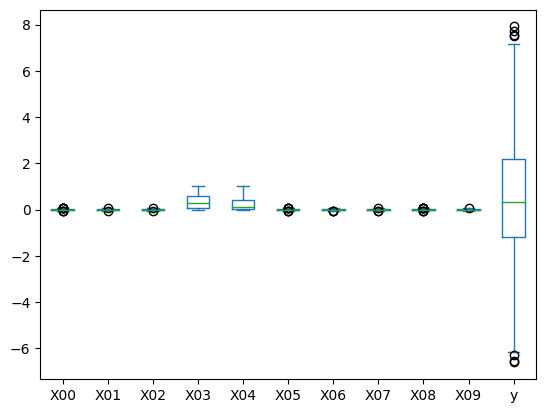

In [108]:
data.plot.box();

In [109]:
correlation_matrix = data.corr()
correlation_matrix

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
X00,1.000000,0.170854,-0.395194,-0.043222,-0.023247,-0.275844,0.280314,0.243400,-0.325324,-0.153477,0.227594
X01,0.170854,1.000000,-0.308342,0.015840,-0.059226,0.102338,0.047167,0.086368,0.009363,-0.268953,0.170725
X02,-0.395194,-0.308342,1.000000,0.028499,0.036766,-0.266042,-0.326706,0.043103,0.195065,0.112824,-0.287004
X03,-0.043222,0.015840,0.028499,1.000000,-0.049209,0.008271,0.011157,-0.006028,0.029519,-0.006292,-0.005415
X04,-0.023247,-0.059226,0.036766,-0.049209,1.000000,-0.018662,-0.048011,-0.002504,-0.006653,0.042886,0.002213
X05,-0.275844,0.102338,-0.266042,0.008271,-0.018662,1.000000,0.119608,-0.292621,0.115454,0.021566,0.369986
X06,0.280314,0.047167,-0.326706,0.011157,-0.048011,0.119608,1.000000,-0.228867,0.054893,-0.274311,0.376340
X07,0.243400,0.086368,0.043103,-0.006028,-0.002504,-0.292621,-0.228867,1.000000,-0.145627,-0.132451,-0.056175
X08,-0.325324,0.009363,0.195065,0.029519,-0.006653,0.115454,0.054893,-0.145627,1.000000,-0.316079,0.209655
X09,-0.153477,-0.268953,0.112824,-0.006292,0.042886,0.021566,-0.274311,-0.132451,-0.316079,1.000000,0.374650


# 2: comment the data exploration

In [110]:
print(f'the columns:\n{correlation_matrix[np.absolute(correlation_matrix["y"]) < 0.15]["y"].index}\nhave less then 0.15 correlation (in absolute value) with the target')

the columns:
Index(['X03', 'X04', 'X07'], dtype='object')
have less then 0.15 correlation (in absolute value) with the target


Also the boxplot shows that the target has a much higher range than the others column and the columns X03 and X04 also have wider ranges than the others

# 3: train a multivariate linear regression model and show the mean square error

In [111]:
#data split
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f'there are {X_train.shape[0]} elements in the train set and {X_test.shape[0]} elements in the test set')

there are 750 elements in the train set and 250 elements in the test set


In [112]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_predicted = linear_model.predict(X_train)
y_test_predicted = linear_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_predicted, squared=False)
test_rmse = mean_squared_error(y_test, y_test_predicted, squared=False)

print(f'the root mean squared error on the train set is: {train_rmse}, the root mean squared error on the test set is: {test_rmse}')

the root mean squared error on the train set is: 0.8670255051442635, the root mean squared error on the test set is: 0.8820070529564412


# 4 train a linear regression model with a reduced dataset 

In [113]:
#data split
reduced_data = data.drop(correlation_matrix[np.absolute(correlation_matrix["y"]) < 0.15]["y"].index, axis=1)
X = reduced_data.drop(target, axis=1)
y = reduced_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f'there are {X_train.shape[0]} elements in the train set and {X_test.shape[0]} elements in the test set')

there are 750 elements in the train set and 250 elements in the test set


In [114]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_predicted = linear_model.predict(X_train)
y_test_predicted = linear_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_predicted, squared=False)
test_rmse = mean_squared_error(y_test, y_test_predicted, squared=False)

print(f'the root mean squared error on the train set is: {train_rmse}, the root mean squared error on the test set is: {test_rmse}')

the root mean squared error on the train set is: 1.00175191197745, the root mean squared error on the test set is: 0.9970971528993043


# 5: train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [115]:
tree_model = DecisionTreeRegressor(random_state=random_state)
tree_model.fit(X_train, y_train)
y_train_predicted = tree_model.predict(X_train)
y_test_predicted = tree_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_predicted, squared=False)
test_rmse = mean_squared_error(y_test, y_test_predicted, squared=False)

print(f'the root mean squared error on the train set is: {train_rmse}, the root mean squared error on the test set is: {test_rmse}')

the root mean squared error on the train set is: 0.0, the root mean squared error on the test set is: 2.0920932042258853


# 5: optimise the depth of the decision tree regressor  

In [116]:
max_depth = tree_model.tree_.max_depth
print(f'the max depth of the tree model is: {max_depth}')

the max depth of the tree model is: 20


In [117]:
depth_range = range(1, max_depth + 1)
rmse_values = []

for dept in depth_range:
    model = DecisionTreeRegressor(max_depth=dept, random_state=random_state)
    rmse = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')
    rmse_values.append(np.mean(rmse))

the best max depth value is: 7


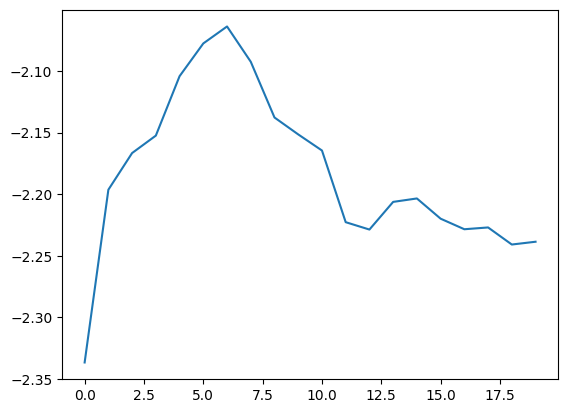

In [118]:
best_depth = depth_range[np.argmax(rmse_values)]
print(f'the best max depth value is: {best_depth}')
plt.plot(range(len(rmse_values)), rmse_values);

In [119]:
best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=random_state)
best_tree_model.fit(X_train, y_train)
best_y_train_predicted = best_tree_model.predict(X_train)
best_y_test_predicted = best_tree_model.predict(X_test)

best_train_rmse = mean_squared_error(y_train, best_y_train_predicted, squared=False)
best_test_rmse = mean_squared_error(y_test, best_y_test_predicted, squared=False)

print(f'the best decision tree root mean squared error on the train set is: {best_train_rmse}, the best decision tree root mean squared error on the test set is: {best_test_rmse}')

the best decision tree root mean squared error on the train set is: 1.0424279050893013, the best decision tree root mean squared error on the test set is: 2.098818358839345


# 7: comment the results 

Removing the loosely correlated values from the dataset does not change the result of the linear regression model.

The result on the train and test set on the linear regression model are basically identical (less then .1 difference) while the difference with the decision tree is much higher (test rmse is the duble of train rmse). Also the rmse value of the test set on the decision tree classifier is much higher than the linear regression one therefore a multivariate linear regression model probably better approximate the data